In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt

from masterthesis.visualization.plot_results import print_config, plot_history
from masterthesis.models.report import report
from masterthesis.results import Results
from masterthesis.utils import CEFR_LABELS, ROUND_CEFR_LABELS

In [3]:
results_path = Path('../results')

## LSTM Attention collapsed

In [4]:
f = results_path / 'taghipour_ng-2019-01-22_12-46-17.pkl'
res = pickle.load(f.open('rb'))
print_config(res.config)

lr            0.001
vocab_size    4000
attention     True
batch_size    32
decay_rate    0.9
round_cefr    True
rnn_dim       300
embed_dim     50
bidirectional False
epochs        50
dropout_rate  0.5


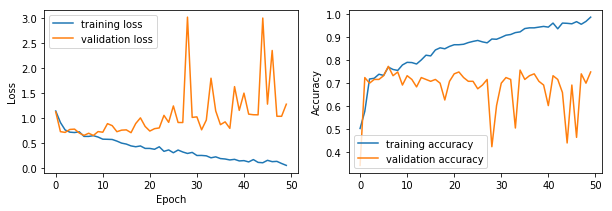

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
plot_history(res.history, *ax)

In [6]:
max(res.history['val_acc'])

0.7723577230926452

             precision    recall  f1-score   support

         A2       0.00      0.00      0.00         1
         B1       0.70      0.88      0.78        42
         B2       0.83      0.72      0.77        67
         C1       0.67      0.62      0.64        13

avg / total       0.76      0.76      0.75       123

Macro F1: 0.547
Micro F1: 0.756
Weighted F1: 0.752
== Confusion matrix ==
[[ 0  1  0  0]
 [ 0 37  5  0]
 [ 0 15 48  4]
 [ 0  0  5  8]]


/uio/hume/student-u65/stigjb/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/uio/hume/student-u65/stigjb/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


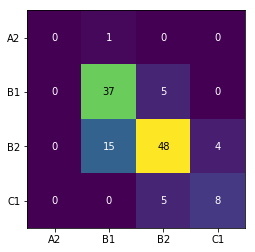

In [7]:
report(res.true, res.predictions, ROUND_CEFR_LABELS);

## LSTM Attention

In [8]:
f = results_path / 'taghipour_ng-2019-01-22_12-43-54.pkl'
res = pickle.load(f.open('rb'))
print_config(res.config)

lr            0.001
vocab_size    4000
attention     True
batch_size    32
decay_rate    0.9
round_cefr    False
rnn_dim       300
embed_dim     50
bidirectional False
epochs        50
dropout_rate  0.5


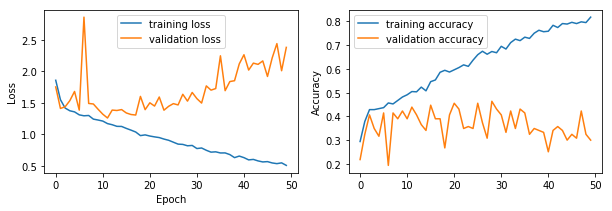

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
plot_history(res.history, *ax)

In [10]:
max(res.history['val_acc'])

0.46341463487322737

             precision    recall  f1-score   support

         A2       0.25      1.00      0.40         1
      A2/B1       0.55      0.50      0.52        22
         B1       0.24      0.25      0.24        20
      B1/B2       0.31      0.33      0.32        30
         B2       0.50      0.62      0.55        37
      B2/C1       0.00      0.00      0.00        10
         C1       0.00      0.00      0.00         3

avg / total       0.37      0.41      0.38       123

Macro F1: 0.292
Micro F1: 0.407
Weighted F1: 0.382
== Confusion matrix ==
[[ 1  0  0  0  0  0  0]
 [ 1 11  9  1  0  0  0]
 [ 2  7  5  5  1  0  0]
 [ 0  1  6 10 13  0  0]
 [ 0  1  0 13 23  0  0]
 [ 0  0  1  3  6  0  0]
 [ 0  0  0  0  3  0  0]]


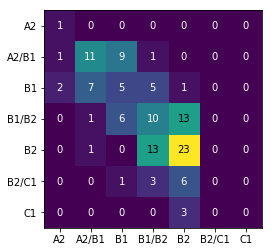

In [11]:
report(res.true, res.predictions, CEFR_LABELS);